# Hacking Happiness

As a psychologist, I'm fascinated by the subject of happiness. Research by Shawn Achor demonstrates that happy people are more creative and productive at work, and earn more over their lifetimes.

Happiness is clearly a goal worth pursuing, so I decided to enlist the help of data science and use myself as a guinea pig. For 3 months now, I've been recording my daily activities, along with my level of subjective well-being.

This is a long-term project for me, but I already have some interesting data. Here's my process...

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns

import pyowm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load data
data = pd.read_csv('mood_201701.csv', parse_dates=True)

# Parse dates, add day of week, then set the date as the index
data['date'] = pd.to_datetime(data['date'])
data['day'] = (data['date'].dt.dayofweek + 1).astype(str)

days_dict = {'1': 'Monday',
            '2': 'Tuesday',
            '3': 'Wednesday',
            '4': 'Thursday',
            '5': 'Friday',
            '6': 'Saturday',
            '7': 'Sunday'}

data['day'] = data['day'].map(days_dict)

data.set_index('date', inplace=True)

# Add the month and year as a new feature
data['date_as_string'] = data.index.astype(str)

data['year'] = data['date_as_string'].str[0:4].astype(int)

# I'm going make the month a string, because its
# numeric data isn't as useful to me as the year.
# I can dummify it later if I choose to.
data['month'] = data['date_as_string'].str[5:7].astype(str)

del data['date_as_string']

In [3]:
# My functions

def rolling_mean_7(df=data):
    '''
    Creates a dataframe with a 7-day rolling mean
    '''
    for i in df.columns:
        if i[-9:] != 'rolling_7':
            newcol = i + '_rolling_7'
            df[newcol] = df[i].rolling(window=7, center=False).mean()
    return df


def corr(x, y, rolling=False, df=data):
    '''
    Quickly return the correlation between 2 items. Numpy
    returns an array, and it really needs this convenience
    function, in my opinion.
    '''
    if rolling == True:
        # Rolling averages produce NaN values for the first several
        # observations.
        return np.corrcoef(x.tail(len(df)-7), y.tail(len(df)-7))[0,1]
    else:
        return np.corrcoef(x, y)[0,1]

    
def strongest_correlations(corr_item=data.mood, df=data):
    '''
    Retrieves a list of strong correlations with a given item.
    (Not used in this public notebook, but I use it privately.)
    '''
    data_with_rolling = df.tail(len(df) - 7)

    co = data_with_rolling.select_dtypes(include=[np.number]).corrwith(corr_item)
    df = pd.DataFrame(co.sort_values(ascending=False),columns=['corr'])
    df['absol'] = np.abs(df['corr'])
    return df.dropna().sort_values('absol', ascending=False)['corr']       

# How I Record My Data

In [ ]:
# Set date before adding data

today = datetime.date.today()

Here's how I record my daily mood and stress level. Through trial-and-error, I've discovered that a 7-point scale works best for me.

I use "stress" as a catch-all term to measure externalities that might be influencing how I feel. Whether it's an upcoming deadline or a presidential election, my "stress" variable records it.

In [ ]:
data.set_value(pd.to_datetime(today), 'mood', 6)
data.set_value(pd.to_datetime(today), 'stress', 5) #reversed. 7 is good.

The problem with my "stress" variable, however, is that it doesn't establish causation. I'm not particularly stressed out when I'm in a great mood, but when I'm in a bad mood, it's possible that little things stress me out more.

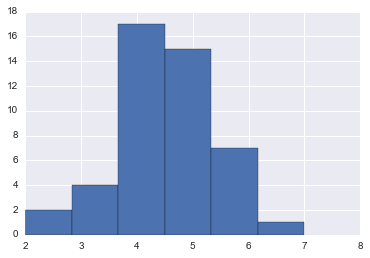

In [4]:
data.mood.hist(bins=6)

I seem to be doing a good job assessing my mood. I know what "average" feels like, and I'm producing a nice bell curve.
 

 
Next are daily activities that are priorities for me. I record the times in minutes:

In [ ]:
# Meditation and exercise: my stand-bys!
data.set_value(pd.to_datetime(today), 'meditate', 10)
data.set_value(pd.to_datetime(today), 'exercise', 20)

# Gotta get my daily Python practice! (I usually estimate this)
data.set_value(pd.to_datetime(today), 'python', 60)

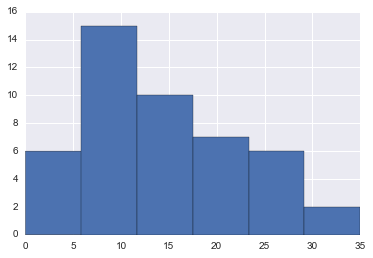

In [5]:
# I meditate daily; typically for around 15 minutes.
data.meditate.hist(bins=6)

In [ ]:
# Hypothesis:
# The amount I have in my savings account has no influence on my overall mood.
# (This is a long-term experiment and I have no meaningful conclusions to share yet!)

data.set_value(pd.to_datetime(today), 'savings', 0.00) # Not going to share this info here :)

In [ ]:
# Hypothesis:
# I love rain. Am I in a better mood on rainy days?

data.set_value(pd.to_datetime(today), 'rain', 1) # Binary: 1 or 0.

I use the following block of code to auto-update some values and create rolling averages. I suspect that rolling averages might capture some trends not apparent in my day-to-day data.

In [ ]:
# Tally my total time spent meditating. (The effects are cumulative!)
data['meditate_total'] = np.cumsum(data['meditate']) + (36*60)
# (I have about 36 hours not offically logged.)

# My methodology produces lots of NaN values -- as it should --
# but I need to replace them with zeroes.
data.fillna(0, inplace=True)

# 7-day rolling average
data = rolling_mean_7(df=data)

#### Additional Data

Here's more data I record on a daily basis. This isn't a complete list; I can easily add and remove features as needed, so I'm just sharing the gist of what I do.

In [ ]:
# Going out with friends or doing improv
data.set_value(pd.to_datetime(today), 'went out', 0)
data.set_value(pd.to_datetime(today), 'improv', 0)

# Work (I'm a professor and teach at two schools)
data.set_value(pd.to_datetime(today), 'sjsu', 0)
data.set_value(pd.to_datetime(today), 'skyline', 0)

# Whom did I see today? Do certain people affect my mood?
# (Remember, I add and remove lines from this code daily.)
data.set_value(pd.to_datetime(today), 'elizabeth', 0)
data.set_value(pd.to_datetime(today), 'carlos', 0)
data.set_value(pd.to_datetime(today), 'michael', 0)

In [ ]:
# I look after my digestive health, so I also keep track of
# what I eat and drink.

# What did I drink?
data.set_value(pd.to_datetime(today), 'coffee', 0)
data.set_value(pd.to_datetime(today), 'tea', 0)
data.set_value(pd.to_datetime(today), 'milk', 0)

# My typical breakfasts
data.set_value(pd.to_datetime(today), 'blueberry muffin', 0)
data.set_value(pd.to_datetime(today), 'smoothie', 0)
data.set_value(pd.to_datetime(today), 'cereal', 0)
data.set_value(pd.to_datetime(today), 'fruit', 0)

# Some common dinners
data.set_value(pd.to_datetime(today), 'salmon', 0)
data.set_value(pd.to_datetime(today), 'chicken', 0)
data.set_value(pd.to_datetime(today), 'veggies', 0)
data.set_value(pd.to_datetime(today), 'pizza', 0)

# Experimenting with supplements
data.set_value(pd.to_datetime(today), 'multivitamin', 0)
data.set_value(pd.to_datetime(today), 'fish oil', 0)

I still strongly believe that the weather affects my mood. Rain seems to calm me, while heat makes me grumpy.

Rather than manually enter the weather every day, the **pyowm** library can automatically retrieve it. For some reason, it isn't properly recording rainfall (which I care about most!), so I still have to do that manually. On the bright side, I can get obscure data like humidity and cloud coverage *just* in case it affects me.

In [ ]:
# API Key
owm = pyowm.OWM('1234567890')

# Sunnyvale
observation =  owm.weather_at_coords(lon=-122.036346, lat=37.368832)

w = observation.get_weather()
temp = w.get_temperature('fahrenheit')['temp']

# Weather
data.set_value(pd.to_datetime(today), 'weather status detailed', w.get_detailed_status())
data.set_value(pd.to_datetime(today), 'weather status', w.get_status())
data.set_value(pd.to_datetime(today), 'clouds', w.get_clouds())
data.set_value(pd.to_datetime(today), 'temperature', temp)
data.set_value(pd.to_datetime(today), 'humidity', w.get_humidity())

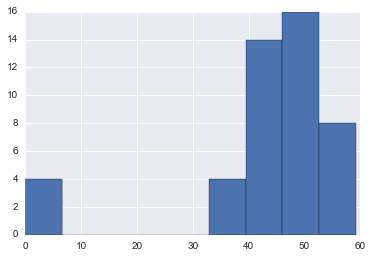

In [6]:
#Let's examine the temperatures

data.temperature.hist(bins=9)

Can you tell I record the temperature at night? But we definitely need to remove those values of zero.

Let's try changing null temperatures to the average of the day before and the day after...

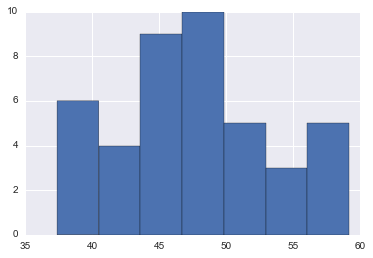

In [7]:
data['temperature'] = np.where(data.temperature == 0,
                               np.mean([data.temperature.shift(1), data.temperature.shift(-1)]),
                               data.temperature)

data.temperature.hist(bins=7)

Cool, it works. (For now, at least.)

And that's how I record my daily data. I'm sure I could get even more granular, but I don't want to spend more than 5 minutes on this every day.

Time to analyze what I have so far!

# Data Analysis

What makes me happy on a daily basis? First let's look at some of my top suspects.

In [8]:
# Correlations

data = data.fillna(0)

# Being social
print('Going out: %.3f' % corr(data.mood, data['went out']))

# One of my best friends
print('Elizabeth: %.3f' % corr(data.mood, data.elizabeth))

# Good friend I see often
print('Branden: %.3f' % corr(data.mood, data.branden))

# Temperature & Rain
print('Temperature: %.3f' % corr(data.mood, data.temperature))
print('Rain: %.3f' % corr(data.mood, data.rain))

# Work
print('Skyline: %.3f' % corr(data.mood, data.skyline))
print('SJSU: %.3f' % corr(data.mood, data.sjsu))
print('Python: %.3f' % corr(data.mood, data.python))

# Health behaviors
print('Meditation: %.3f' % corr(data.mood, data.meditate))
print('Exercise: %.3f' % corr(data.mood, data.exercise))

Going out: 0.284
Elizabeth: 0.505
Branden: 0.139
Temperature: -0.297
Rain: -0.072
Skyline: -0.315
SJSU: -0.227
Python: 0.166
Meditation: -0.035
Exercise: 0.119


### Initial Thoughts

- My life is better when I'm social. This is good for me to know; I'm an extravert but I have some strong introvert tendencies. As a result of this data, I've already made it my policy to say "yes" to all invitations. I rarely regret it.


- I'm seeing the weakness of correlations. I'm certainly happy when I'm hanging out with Elizabeth, but it's also because we're often doing fun things like seeing a concert or performing improv.


- Higher temperatures do indeed seem to make me grumpy. But I only have 3 months of data; I'd want to do this for an entire year before I draw any real conclusions.


- I love teaching, but it's clearly been stressful for me lately. I'm happier when I'm studying Python and machine learning.


- No strong relationship between health behaviors and how I feel on a day-to-day basis. If anything, feeling lousy reminds me that I should meditate.


- What?! Negative correlation between rain and mood?! It's weak, but still. Let's check something real quick...

In [9]:
data.rain.sum()

11.0

I only have 11 data points for rainy days. No need to draw any conclusions just yet.

Now, let's do this one more time and look at the **7-day rolling average** instead.

In [10]:
# Being social
print('Going out: %.3f' % corr(data.mood_rolling_7, data['went out_rolling_7'], rolling=True))
print('Elizabeth: %.3f' % corr(data.mood_rolling_7, data.elizabeth_rolling_7, rolling=True))
print('Branden: %.3f' % corr(data.mood_rolling_7, data.branden_rolling_7, rolling=True))
print('Temperature: %.3f' % corr(data.mood_rolling_7, data.temperature_rolling_7, rolling=True))
print('Rain: %.3f' % corr(data.mood_rolling_7, data.rain_rolling_7, rolling=True))
print('Skyline: %.3f' % corr(data.mood_rolling_7, data.skyline_rolling_7, rolling=True))
print('SJSU: %.3f' % corr(data.mood_rolling_7, data.sjsu_rolling_7, rolling=True))
print('Python: %.3f' % corr(data.mood_rolling_7, data.python_rolling_7, rolling=True))
print('Meditation: %.3f' % corr(data.mood_rolling_7, data.meditate_rolling_7, rolling=True))
print('Exercise: %.3f' % corr(data.mood_rolling_7, data.exercise_rolling_7, rolling=True))

Going out: 0.227
Elizabeth: 0.493
Branden: 0.184
Temperature: -0.384
Rain: -0.120
Skyline: -0.655
SJSU: -0.749
Python: 0.306
Meditation: 0.324
Exercise: 0.297


I still need more data, but these correlations mostly support my intuition. We'll build a model shortly, but for now it's probably fair to say:

- Friends make me happier.
- Teaching stressed me out this past semester.
- There **is**, in fact, a relationship between meditation, exercise, and happiness. This is just a correlation, but research shows that these health behaviors actually do increase subjective well-being.

# Visualizations

I currently have over 200 features in my dataset. Most of them are turning out to be just noise, so we'll create a new dataframe that focuses on what I'm most interested in.

My intuition tells me that I should focus on rolling weekly averages, because that will eliminate even more noise in my day-to-day data.

In [11]:
# Mood, stress, health behaviors, friends I see often, and weather.

data_subset = data[['mood_rolling_7', 'stress_rolling_7', 'meditate_rolling_7',
                     'exercise_rolling_7', 'improv_rolling_7', 'skyline_rolling_7',
                    'sjsu_rolling_7', 'python_rolling_7', 'carlos_rolling_7', 'andy_rolling_7',
                    'elizabeth_rolling_7', 'branden_rolling_7', 'sonica_rolling_7',
                    'temperature_rolling_7', 'rain_rolling_7']].tail(len(data)-7)

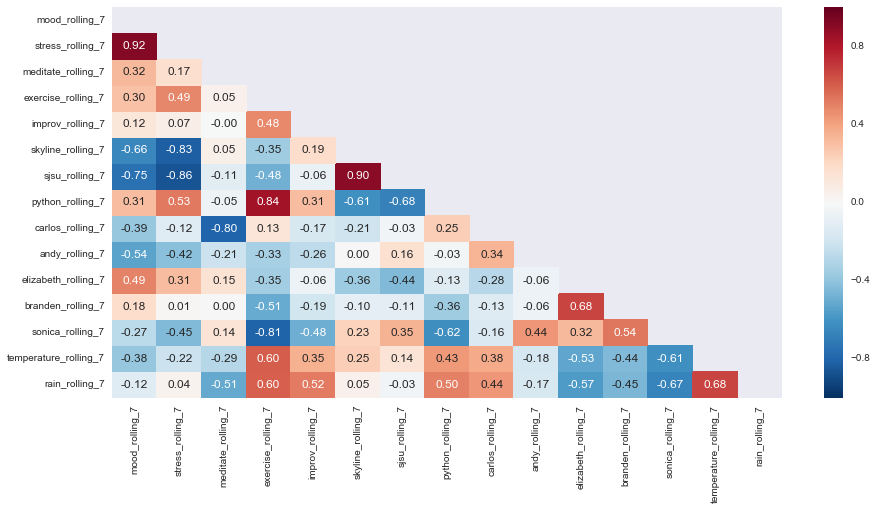

In [12]:
# Visualize the correlations between each variable

corrs = data_subset.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set_context('notebook')

# Resize and display
plt.figure(figsize=(15,7))
sns.heatmap(corrs, annot=True, fmt='.2f', mask=mask)

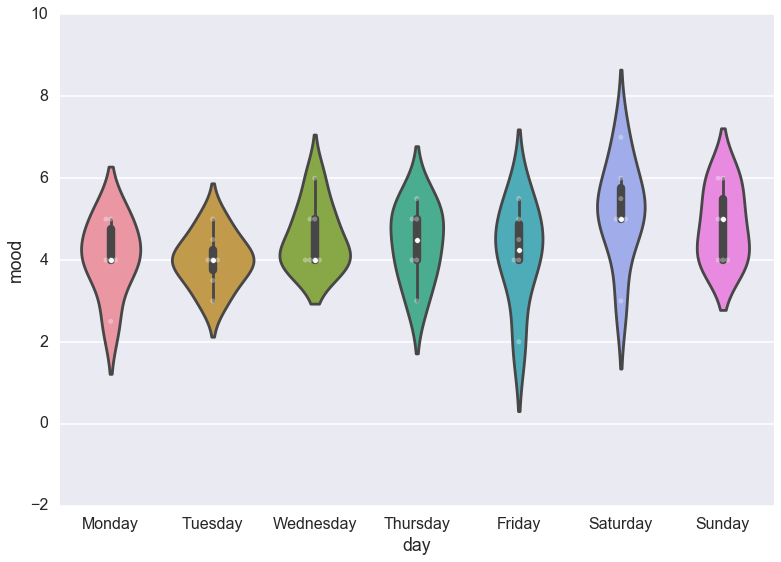

In [13]:
# Mood by day

sns.set_context('poster')

sns.violinplot(x='day', y='mood', data=data,
               order=['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                      'Friday', 'Saturday', 'Sunday'])

# Overlay the data points so we can see what's going on.
sns.swarmplot(x='day', y='mood', data=data, color='white', alpha=.33,
               order=['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                      'Friday', 'Saturday', 'Sunday'])

Saturday is clearly my favorite day. It looks like a single bad day is bringing down Friday's average. Funny how I don't remember what happened!

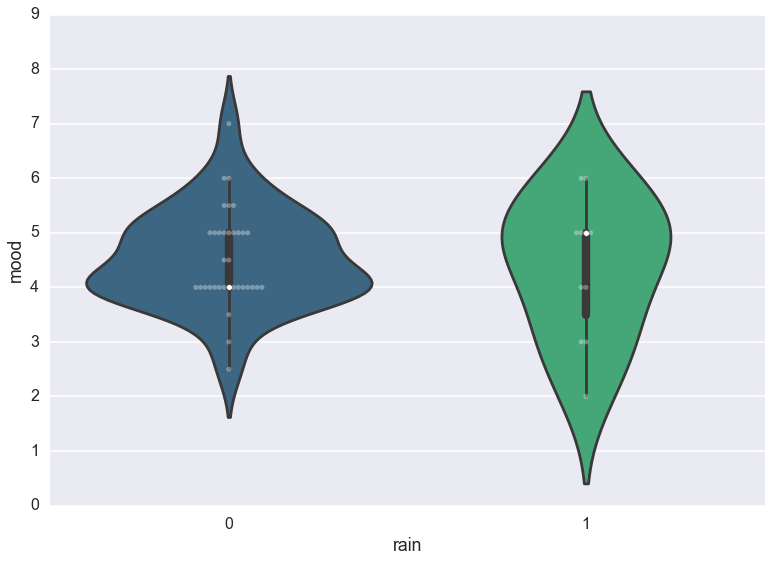

In [14]:
# Mood by rain

sns.violinplot(x='rain', y='mood', data=data,
               order=[0, 1], palette='viridis')

# Overlay the data points so we can see what's going on.
sns.swarmplot(x='rain', y='mood', data=data, color='white', alpha=.33,
               order=[0,1])

We need to settle this once and for all. Does rain affect my mood? Let's break out some inferential statistics.

In [15]:
from scipy.stats import ttest_ind

ttest_ind(data[data.rain == 1]['mood'], data[data.rain == 0]['mood'])

Ttest_indResult(statistic=-0.47980182124408005, pvalue=0.63374487422683723)

That p-value is far too high. In science-speak, we would say that we currently can't reject the null hypothesis. Rain doesn't seem to change my overall mood.

# Machine Learning

Although other algorithms provide higher r-squared scores, I'm going to perform a simple linear regression on this data. Looking at the coefficients and standard errors might offer some valuable clues.

Looking at coefficients can be dangerous if you don't understand the model or your data, so I'll take the results with a grain of salt.

In [16]:
x = data_subset.dropna()

# Stress levels and mood have a 0.78 correlation for me.
# Far too high; it'll mess up the model so let's exclude it.
del x['stress_rolling_7']

y = x.pop('mood_rolling_7')

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from warnings import filterwarnings

# Complains otherwise that some features are constant.
filterwarnings('ignore')

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.20)

reg = LinearRegression()

scores = []

# Monte Carlo evaluation; let's run this model 100 times
for i in range(100):
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.2)
    reg.fit(xtrain,ytrain)
    pred = reg.predict(xtest)
    scores.append(r2_score(ytest, pred))

print('Average r-squared: %.3f' % np.mean(scores))

Average r-squared: 0.677


In [18]:
# Coefficients
results = pd.DataFrame([x.columns, reg.coef_]).T

results.columns = ['feature', 'coefficient']

# Standard errors; more useful for measuring relative importance
import statsmodels.api as sm
ols = sm.OLS(y, x).fit()
results['standard error'] = np.array(ols.bse)


results.sort_values('standard error', ascending=False)

,feature,coefficient,standard error
2,improv_rolling_7,-0.17921,1.460507
4,sjsu_rolling_7,-1.95865,1.414440
7,andy_rolling_7,-2.11657,1.380727
8,elizabeth_rolling_7,1.16554,0.930745
6,carlos_rolling_7,-0.170008,0.889958
9,branden_rolling_7,-0.667847,0.884766
12,rain_rolling_7,1.36063,0.781241
3,skyline_rolling_7,-0.441122,0.697603
10,sonica_rolling_7,0.278862,0.561952
1,exercise_rolling_7,0.0271535,0.045907


This model is hard to understand. Several of my *friends* have negative coefficients. The model works -- it has a good r-squared score -- but it's not intuitive by human standards.

Since the linear model is unintuitive, it's lost its primary appeal to me. At this point, I might as well use a "black box" and employ a random forest instead.

In [19]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(n_estimators=30)

scores = []

for i in range(100):
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.2)
    reg.fit(xtrain,ytrain)
    pred = reg.predict(xtest)
    scores.append(r2_score(ytest, pred))

print('Average r-squared: %.3f' % np.mean(scores))

Average r-squared: 0.806


Random forest works even better if I only care about predictive power.

For now, I'm best off trusting my intuition; living heathfully and being social makes me a happier person. As I gather more data, however, I'll be able to quantify these effects more accurately.